In [3]:
pip install pysubspace

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pysubspace (from versions: none)
ERROR: No matching distribution found for pysubspace


In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from datetime import datetime
import numpy as np
import skfuzzy as fuzz
import numpy as np
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture


skip_rows = 4

data = pd.read_excel(r"C:\\Users\\sunid\\Downloads\\System_Log_Detail_19-12-2023_10-01-32_PM.xlsx",skiprows=skip_rows)

C:\Users\sunid\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
data.head()

,Latitude,Longitude,IGN,PWR,GPS,Other Ports,Speed,Odometer,Data Actual Time,Data Received Time,Difference Duration,Heart Beat Data,History Data,Data String
0,251144733,859972356,Off,On,On,Immobilize=Off,0,0,18-12-2023 00:04:23,18-12-2023 00:04:23,00:00:00,Yes,No,"### 78, 78, , 13, 45, 06, 04, 00, 01, 00, 2..."
1,251144733,859972356,Off,On,On,Immobilize=Off,0,0,18-12-2023 00:05:06,18-12-2023 00:05:08,00:00:02,No,No,"78, 78, , 12, 17, 0c, 11, 12, 23, 06, c6, 02, ..."
2,251144733,859972356,Off,On,On,Immobilize=Off,0,0,18-12-2023 00:09:49,18-12-2023 00:09:54,00:00:05,No,No,"78, 78, , 12, 17, 0c, 11, 12, 27, 31, c6, 02, ..."
3,251144733,859972356,Off,On,On,Immobilize=Off,0,0,18-12-2023 00:14:31,18-12-2023 00:14:34,00:00:03,No,No,"78, 78, , 12, 17, 0c, 11, 12, 2c, 1f, c6, 02, ..."
4,251144733,859972356,Off,On,On,Immobilize=Off,0,0,18-12-2023 00:18:34,18-12-2023 00:18:34,00:00:00,Yes,No,"### 78, 78, , 13, 45, 06, 04, 00, 01, 00, 3..."


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Latitude             3407 non-null   int64 
 1   Longitude            3407 non-null   int64 
 2   IGN                  3407 non-null   object
 3   PWR                  3407 non-null   object
 4   GPS                  3407 non-null   object
 5   Other Ports          3407 non-null   object
 6   Speed                3407 non-null   int64 
 7   Odometer             3407 non-null   int64 
 8   Data Actual Time     3407 non-null   object
 9   Data Received Time   3407 non-null   object
 10  Difference Duration  3407 non-null   object
 11  Heart Beat Data      3407 non-null   object
 12  History Data         3407 non-null   object
 13  Data String          3407 non-null   object
dtypes: int64(4), object(10)
memory usage: 372.8+ KB


In [28]:
data.isnull()

,Latitude,Longitude,IGN,PWR,GPS,Other Ports,Speed,Odometer,Data Actual Time,Data Received Time,Difference Duration,Heart Beat Data,History Data,Data String
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3403,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3404,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3405,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
data.isnull().sum()  

Latitude               0
Longitude              0
IGN                    0
PWR                    0
GPS                    0
Other Ports            0
Speed                  0
Odometer               0
Data Actual Time       0
Data Received Time     0
Difference Duration    0
Heart Beat Data        0
History Data           0
Data String            0
dtype: int64

In [30]:
desired_column = ['Latitude','Longitude','Data Actual Time', 'Speed']
column_data = data[desired_column]

column_data[['Date', 'Time']] = data['Data Actual Time'].str.split(expand=True)

column_data = column_data.drop('Data Actual Time', axis=1)

time_column = 'Time'
column_data[time_column] = pd.to_timedelta(column_data[time_column]).dt.total_seconds()




column_data


C:\Users\sunid\AppData\Local\Temp\ipykernel_17600\2525434027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data[['Date', 'Time']] = data['Data Actual Time'].str.split(expand=True)
C:\Users\sunid\AppData\Local\Temp\ipykernel_17600\2525434027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data[['Date', 'Time']] = data['Data Actual Time'].str.split(expand=True)


,Latitude,Longitude,Speed,Date,Time
0,251144733,859972356,0,18-12-2023,263.0
1,251144733,859972356,0,18-12-2023,306.0
2,251144733,859972356,0,18-12-2023,589.0
3,251144733,859972356,0,18-12-2023,871.0
4,251144733,859972356,0,18-12-2023,1114.0
...,...,...,...,...,...
3402,251144422,859972800,0,18-12-2023,84815.0
3403,251144422,859972800,0,18-12-2023,84896.0
3404,251144422,859972800,0,18-12-2023,85154.0
3405,251144422,859972800,0,18-12-2023,85179.0


In [31]:
column_data.isnull()

,Latitude,Longitude,Speed,Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3402,False,False,False,False,False
3403,False,False,False,False,False
3404,False,False,False,False,False
3405,False,False,False,False,False


In [32]:
column_data.isnull().sum()

Latitude     0
Longitude    0
Speed        0
Date         0
Time         0
dtype: int64

In [33]:
data_set = column_data.loc[~((column_data['Speed'] == 0) & (column_data.duplicated(subset=['Latitude', 'Longitude'])))]

# Resetting index if needed
data_set.reset_index(drop=True, inplace=True)

In [34]:
data_set

,Latitude,Longitude,Speed,Date,Time
0,251144733,859972356,0,18-12-2023,263.0
1,251144756,859972267,0,18-12-2023,28635.0
2,251144756,859972267,9,18-12-2023,28638.0
3,251144756,859972267,6,18-12-2023,28639.0
4,251144756,859972267,9,18-12-2023,28642.0
...,...,...,...,...,...
2797,251143867,859973422,0,18-12-2023,66809.0
2798,251144089,859973689,0,18-12-2023,66819.0
2799,251144356,859972622,0,18-12-2023,66829.0
2800,251144511,859972889,10,18-12-2023,67263.0


In [35]:
data_set.drop(['Speed', 'Date'], axis=1, inplace=True)

C:\Users\sunid\AppData\Local\Temp\ipykernel_17600\484891792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.drop(['Speed', 'Date'], axis=1, inplace=True)


In [36]:
data_set

,Latitude,Longitude,Time
0,251144733,859972356,263.0
1,251144756,859972267,28635.0
2,251144756,859972267,28638.0
3,251144756,859972267,28639.0
4,251144756,859972267,28642.0
...,...,...,...
2797,251143867,859973422,66809.0
2798,251144089,859973689,66819.0
2799,251144356,859972622,66829.0
2800,251144511,859972889,67263.0


In [37]:
new_data= data_set

def scale_Latitude(Latitude):
    return (Latitude / 1810000000) * 100

def scale_Longitude(longitude):
    return (longitude / 3610000000) * 100

def scale_Time(Time):
    return (Time / 86400) * 100

new_data['Latitude'] = new_data['Latitude'].apply(scale_Latitude)
new_data['Longitude'] = new_data['Longitude'].apply(scale_Longitude)
new_data['Time'] = new_data['Time'].apply(scale_Time)

new_data

C:\Users\sunid\AppData\Local\Temp\ipykernel_17600\3920044425.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Latitude'] = new_data['Latitude'].apply(scale_Latitude)
C:\Users\sunid\AppData\Local\Temp\ipykernel_17600\3920044425.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Longitude'] = new_data['Longitude'].apply(scale_Longitude)
C:\Users\sunid\AppData\Local\Temp\ipykernel_17600\3920044425.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Latitude,Longitude,Time
0,13.875400,23.821949,0.304398
1,13.875401,23.821946,33.142361
2,13.875401,23.821946,33.145833
3,13.875401,23.821946,33.146991
4,13.875401,23.821946,33.150463
...,...,...,...
2797,13.875352,23.821978,77.325231
2798,13.875364,23.821986,77.336806
2799,13.875379,23.821956,77.348380
2800,13.875387,23.821964,77.850694


In [38]:
new_data

,Latitude,Longitude,Time
0,13.875400,23.821949,0.304398
1,13.875401,23.821946,33.142361
2,13.875401,23.821946,33.145833
3,13.875401,23.821946,33.146991
4,13.875401,23.821946,33.150463
...,...,...,...
2797,13.875352,23.821978,77.325231
2798,13.875364,23.821986,77.336806
2799,13.875379,23.821956,77.348380
2800,13.875387,23.821964,77.850694


In [39]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(new_data)
    wcss.append(km.inertia_)

In [40]:
wcss

[355548.0916817611,
 87638.7674325145,
 41941.1248323623,
 24961.22575788542,
 16534.798981501837,
 12663.518703473064,
 9713.281593896463,
 8016.337900405817,
 6329.88850860217,
 5270.196283192647,
 4322.208500410161,
 3582.9700825931486,
 3054.253152745749,
 2545.7953689679453,
 2124.8270196715143,
 1824.5860656968127,
 1641.297827845792,
 1435.6548026039468,
 1272.0520982221724]

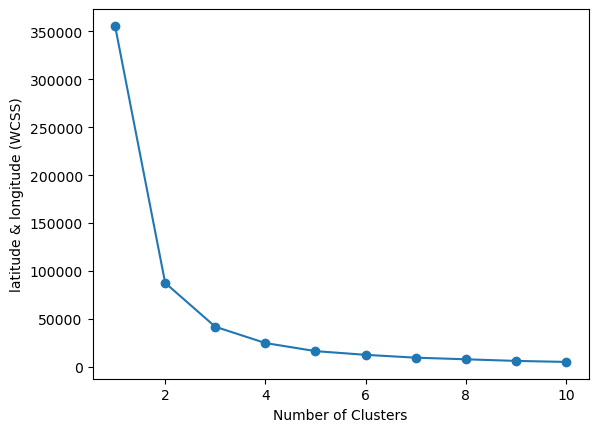

In [41]:

df = pd.DataFrame(new_data)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('latitude & longitude (WCSS)')
plt.show()


       Latitude  Longitude       Time  Cluster
0     13.875400  23.821949   0.304398        1
1     13.875401  23.821946  33.142361        1
2     13.875401  23.821946  33.145833        1
3     13.875401  23.821946  33.146991        1
4     13.875401  23.821946  33.150463        1
...         ...        ...        ...      ...
2797  13.875352  23.821978  77.325231        0
2798  13.875364  23.821986  77.336806        0
2799  13.875379  23.821956  77.348380        0
2800  13.875387  23.821964  77.850694        0
2801  13.875382  23.821961  96.778935        0

[2802 rows x 4 columns]


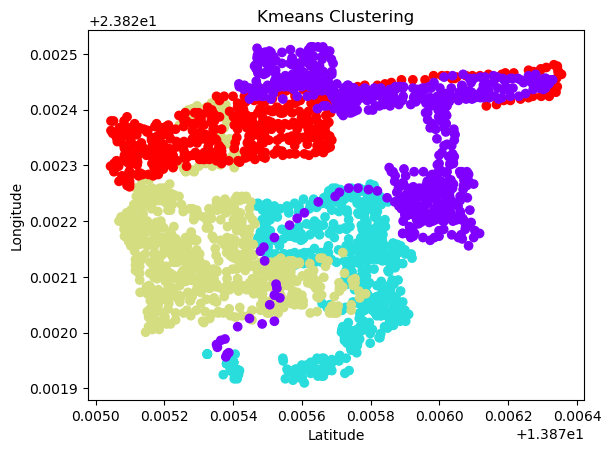

In [42]:

df = pd.DataFrame(new_data)

k = 4

kmeans = KMeans(n_clusters=k)

kmeans.fit(df)

labels = kmeans.labels_

df['Cluster'] = labels

print(df)

plt.scatter(df['Latitude'], df['Longitude'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Kmeans Clustering')
plt.show()


       Latitude  Longitude       Time  Cluster
0     13.875400  23.821949   0.304398        3
1     13.875401  23.821946  33.142361        3
2     13.875401  23.821946  33.145833        3
3     13.875401  23.821946  33.146991        3
4     13.875401  23.821946  33.150463        3
...         ...        ...        ...      ...
2797  13.875352  23.821978  77.325231        1
2798  13.875364  23.821986  77.336806        1
2799  13.875379  23.821956  77.348380        1
2800  13.875387  23.821964  77.850694        1
2801  13.875382  23.821961  96.778935        1

[2802 rows x 4 columns]


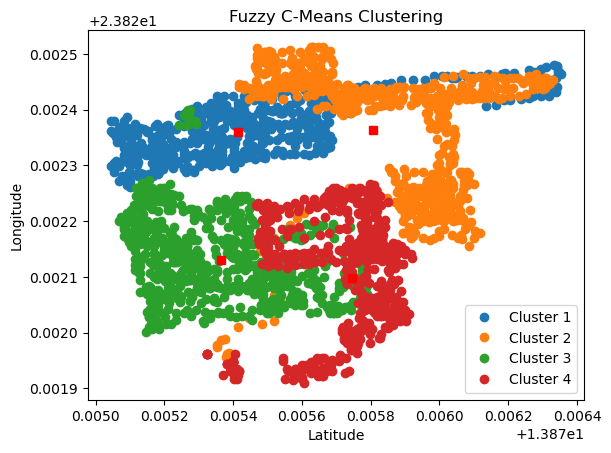

In [43]:
df = pd.DataFrame(new_data)

c = 4

columns_for_clustering = ['Latitude', 'Longitude', 'Time']

data_for_clustering = df[columns_for_clustering].values.T 

centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(data_for_clustering, c, 2, error=0.005, maxiter=1000, init=None)

labels = np.argmax(u, axis=0)

df['Cluster'] = labels

print(df)

fig, ax = plt.subplots()
for j in range(c):
    ax.plot(df['Latitude'][labels == j], df['Longitude'][labels == j], 'o', label=f'Cluster {j + 1}')

for pt in centers:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()

In [44]:
data_set

,Latitude,Longitude,Time,Cluster
0,13.875400,23.821949,0.304398,3
1,13.875401,23.821946,33.142361,3
2,13.875401,23.821946,33.145833,3
3,13.875401,23.821946,33.146991,3
4,13.875401,23.821946,33.150463,3
...,...,...,...,...
2797,13.875352,23.821978,77.325231,1
2798,13.875364,23.821986,77.336806,1
2799,13.875379,23.821956,77.348380,1
2800,13.875387,23.821964,77.850694,1


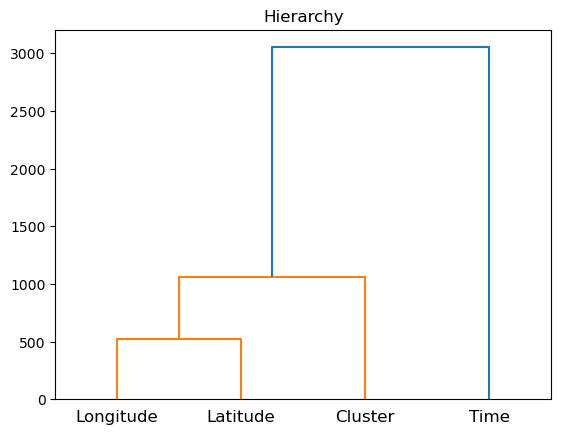

In [45]:

data_for_clustering = data_set.T 

linked = hierarchy.linkage(data_for_clustering, 'ward')

dendrogram = hierarchy.dendrogram(linked, labels=data_set.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title("Hierarchy")
plt.show()

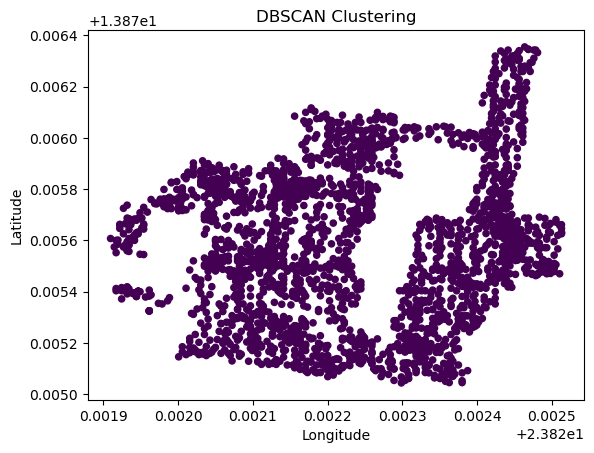

In [46]:


data_for_clustering = df[['Latitude', 'Longitude']] 


dbscan = DBSCAN(eps=0.1, min_samples=5) 
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_for_clustering)


plt.scatter(df['Longitude'], df['Latitude'], c=df['DBSCAN_Cluster'], cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


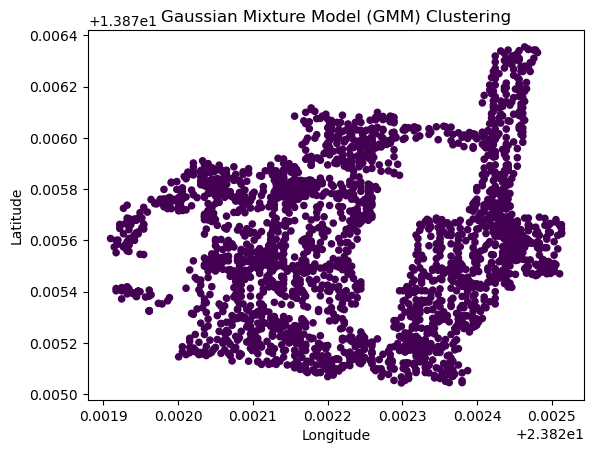

In [48]:
data_for_clustering = df[['Latitude', 'Longitude']]  


gmm = GaussianMixture(n_components=3) 
df['GMM_Cluster'] = gmm.fit_predict(data_for_clustering)


plt.scatter(df['Longitude'], df['Latitude'], c=df['GMM_Cluster'], cmap='viridis', s=20)
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

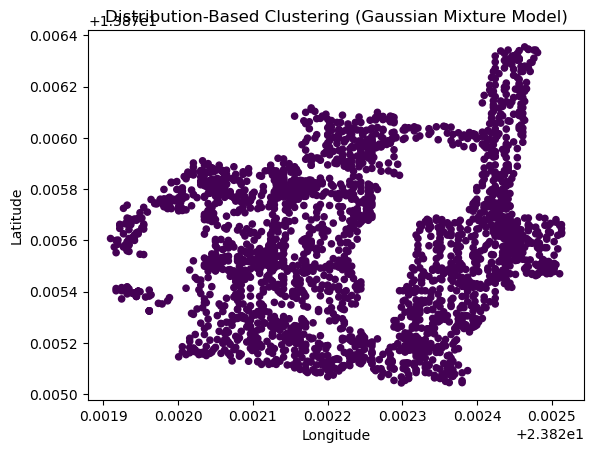

In [49]:

data_for_clustering = df[['Latitude', 'Longitude']]  


gmm = GaussianMixture(n_components=3)  
df['GMM_Cluster'] = gmm.fit_predict(data_for_clustering)


plt.scatter(df['Longitude'], df['Latitude'], c=df['GMM_Cluster'], cmap='viridis', s=20)
plt.title('Distribution-Based Clustering (Gaussian Mixture Model)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

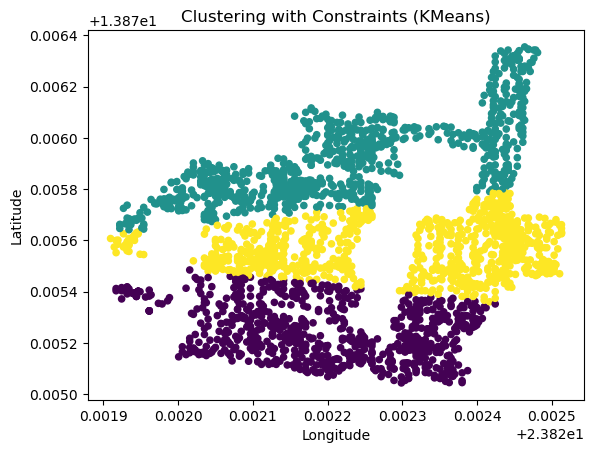

In [50]:
data_for_clustering = df[['Latitude', 'Longitude']]  


kmeans = KMeans(n_clusters=3)  
df['KMeans_Cluster'] = kmeans.fit_predict(data_for_clustering)


df.loc[df['Latitude'] > 40, 'KMeans_Cluster'] = 0
df.loc[df['Longitude'] < -80, 'KMeans_Cluster'] = 1


plt.scatter(df['Longitude'], df['Latitude'], c=df['KMeans_Cluster'], cmap='viridis', s=20)
plt.title('Clustering with Constraints (KMeans)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()